"""
# 📊 IPL Season Analysis: Winners, Runners-up & Playoff Qualifiers

**Analysis of IPL season performance with consistent team colors**
"""

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

# Add src folder to path for team colors config
sys.path.append('../src')
from team_colors_config import TEAM_COLORS, get_team_color, get_team_abbr

# Styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load cleaned data
matches_clean = pd.read_csv('../data/processed/matches_clean.csv')
matches_clean['date'] = pd.to_datetime(matches_clean['date'])

print("="*80)
print("📊 IPL SEASON ANALYSIS")
print("="*80)
print(f"✅ Loaded: {matches_clean.shape[0]} matches")
print(f"📅 Seasons: {matches_clean['season'].min()} - {matches_clean['season'].max()}")
print(f"🏏 Total Seasons: {matches_clean['season'].nunique()}")

📊 IPL SEASON ANALYSIS
✅ Loaded: 1095 matches
📅 Seasons: 2007/08 - 2024
🏏 Total Seasons: 17


In [15]:
# Get finals (last match of each season)
season_finals = matches_clean.sort_values('date').groupby('season').last().reset_index()

# Winners and Runners-up
season_summary = []
for _, match in season_finals.iterrows():
    season = match['season']
    winner = match['winner']
    teams = [match['team1'], match['team2']]
    runner_up = [team for team in teams if team != winner][0] if winner in teams else 'Unknown'
    season_summary.append({'Season': season, 'Winner': winner, 'Runner-up': runner_up})

winners_df = pd.DataFrame(season_summary).sort_values('Season')

# Playoff qualifiers (top 4 teams by wins each season)
def get_playoff_teams(season_matches):
    team_wins = {}
    for _, match in season_matches.iterrows():
        if pd.notna(match['winner']):
            team_wins[match['winner']] = team_wins.get(match['winner'], 0) + 1
    sorted_teams = sorted(team_wins.items(), key=lambda x: x[1], reverse=True)
    return [team for team, wins in sorted_teams[:4]]

playoff_data = []
for season in sorted(matches_clean['season'].unique()):
    season_matches = matches_clean[matches_clean['season'] == season]
    playoff_teams = get_playoff_teams(season_matches)
    playoff_data.append({'Season': season, 'Playoff_Teams': playoff_teams})

playoff_df = pd.DataFrame(playoff_data)
full_season_data = winners_df.merge(playoff_df, on='Season')

# Overall statistics
championship_count = winners_df['Winner'].value_counts()
runnerup_count = winners_df['Runner-up'].value_counts()
all_playoff_teams = [team for teams in playoff_df['Playoff_Teams'] for team in teams]
playoff_count = pd.Series(all_playoff_teams).value_counts()

# Display results
print("\n🏆 Winners and Runners-up:")
print(winners_df.to_string(index=False))

print("\n\n📊 Overall Statistics:")
print(f"\nMost Championships: {championship_count.head(5).to_dict()}")
print(f"Most Runner-ups: {runnerup_count.head(5).to_dict()}")
print(f"Most Playoffs: {playoff_count.head(5).to_dict()}")


🏆 Winners and Runners-up:
 Season                Winner                   Runner-up
2007/08      Rajasthan Royals         Chennai Super Kings
   2009       Deccan Chargers Royal Challengers Bengaluru
2009/10   Chennai Super Kings              Mumbai Indians
   2011   Chennai Super Kings Royal Challengers Bengaluru
   2012 Kolkata Knight Riders         Chennai Super Kings
   2013        Mumbai Indians         Chennai Super Kings
   2014 Kolkata Knight Riders                Punjab Kings
   2015        Mumbai Indians         Chennai Super Kings
   2016   Sunrisers Hyderabad Royal Challengers Bengaluru
   2017        Mumbai Indians     Rising Pune Supergiants
   2018   Chennai Super Kings         Sunrisers Hyderabad
   2019        Mumbai Indians         Chennai Super Kings
2020/21        Mumbai Indians              Delhi Capitals
   2021   Chennai Super Kings       Kolkata Knight Riders
   2022        Gujarat Titans            Rajasthan Royals
   2023   Chennai Super Kings              Gu

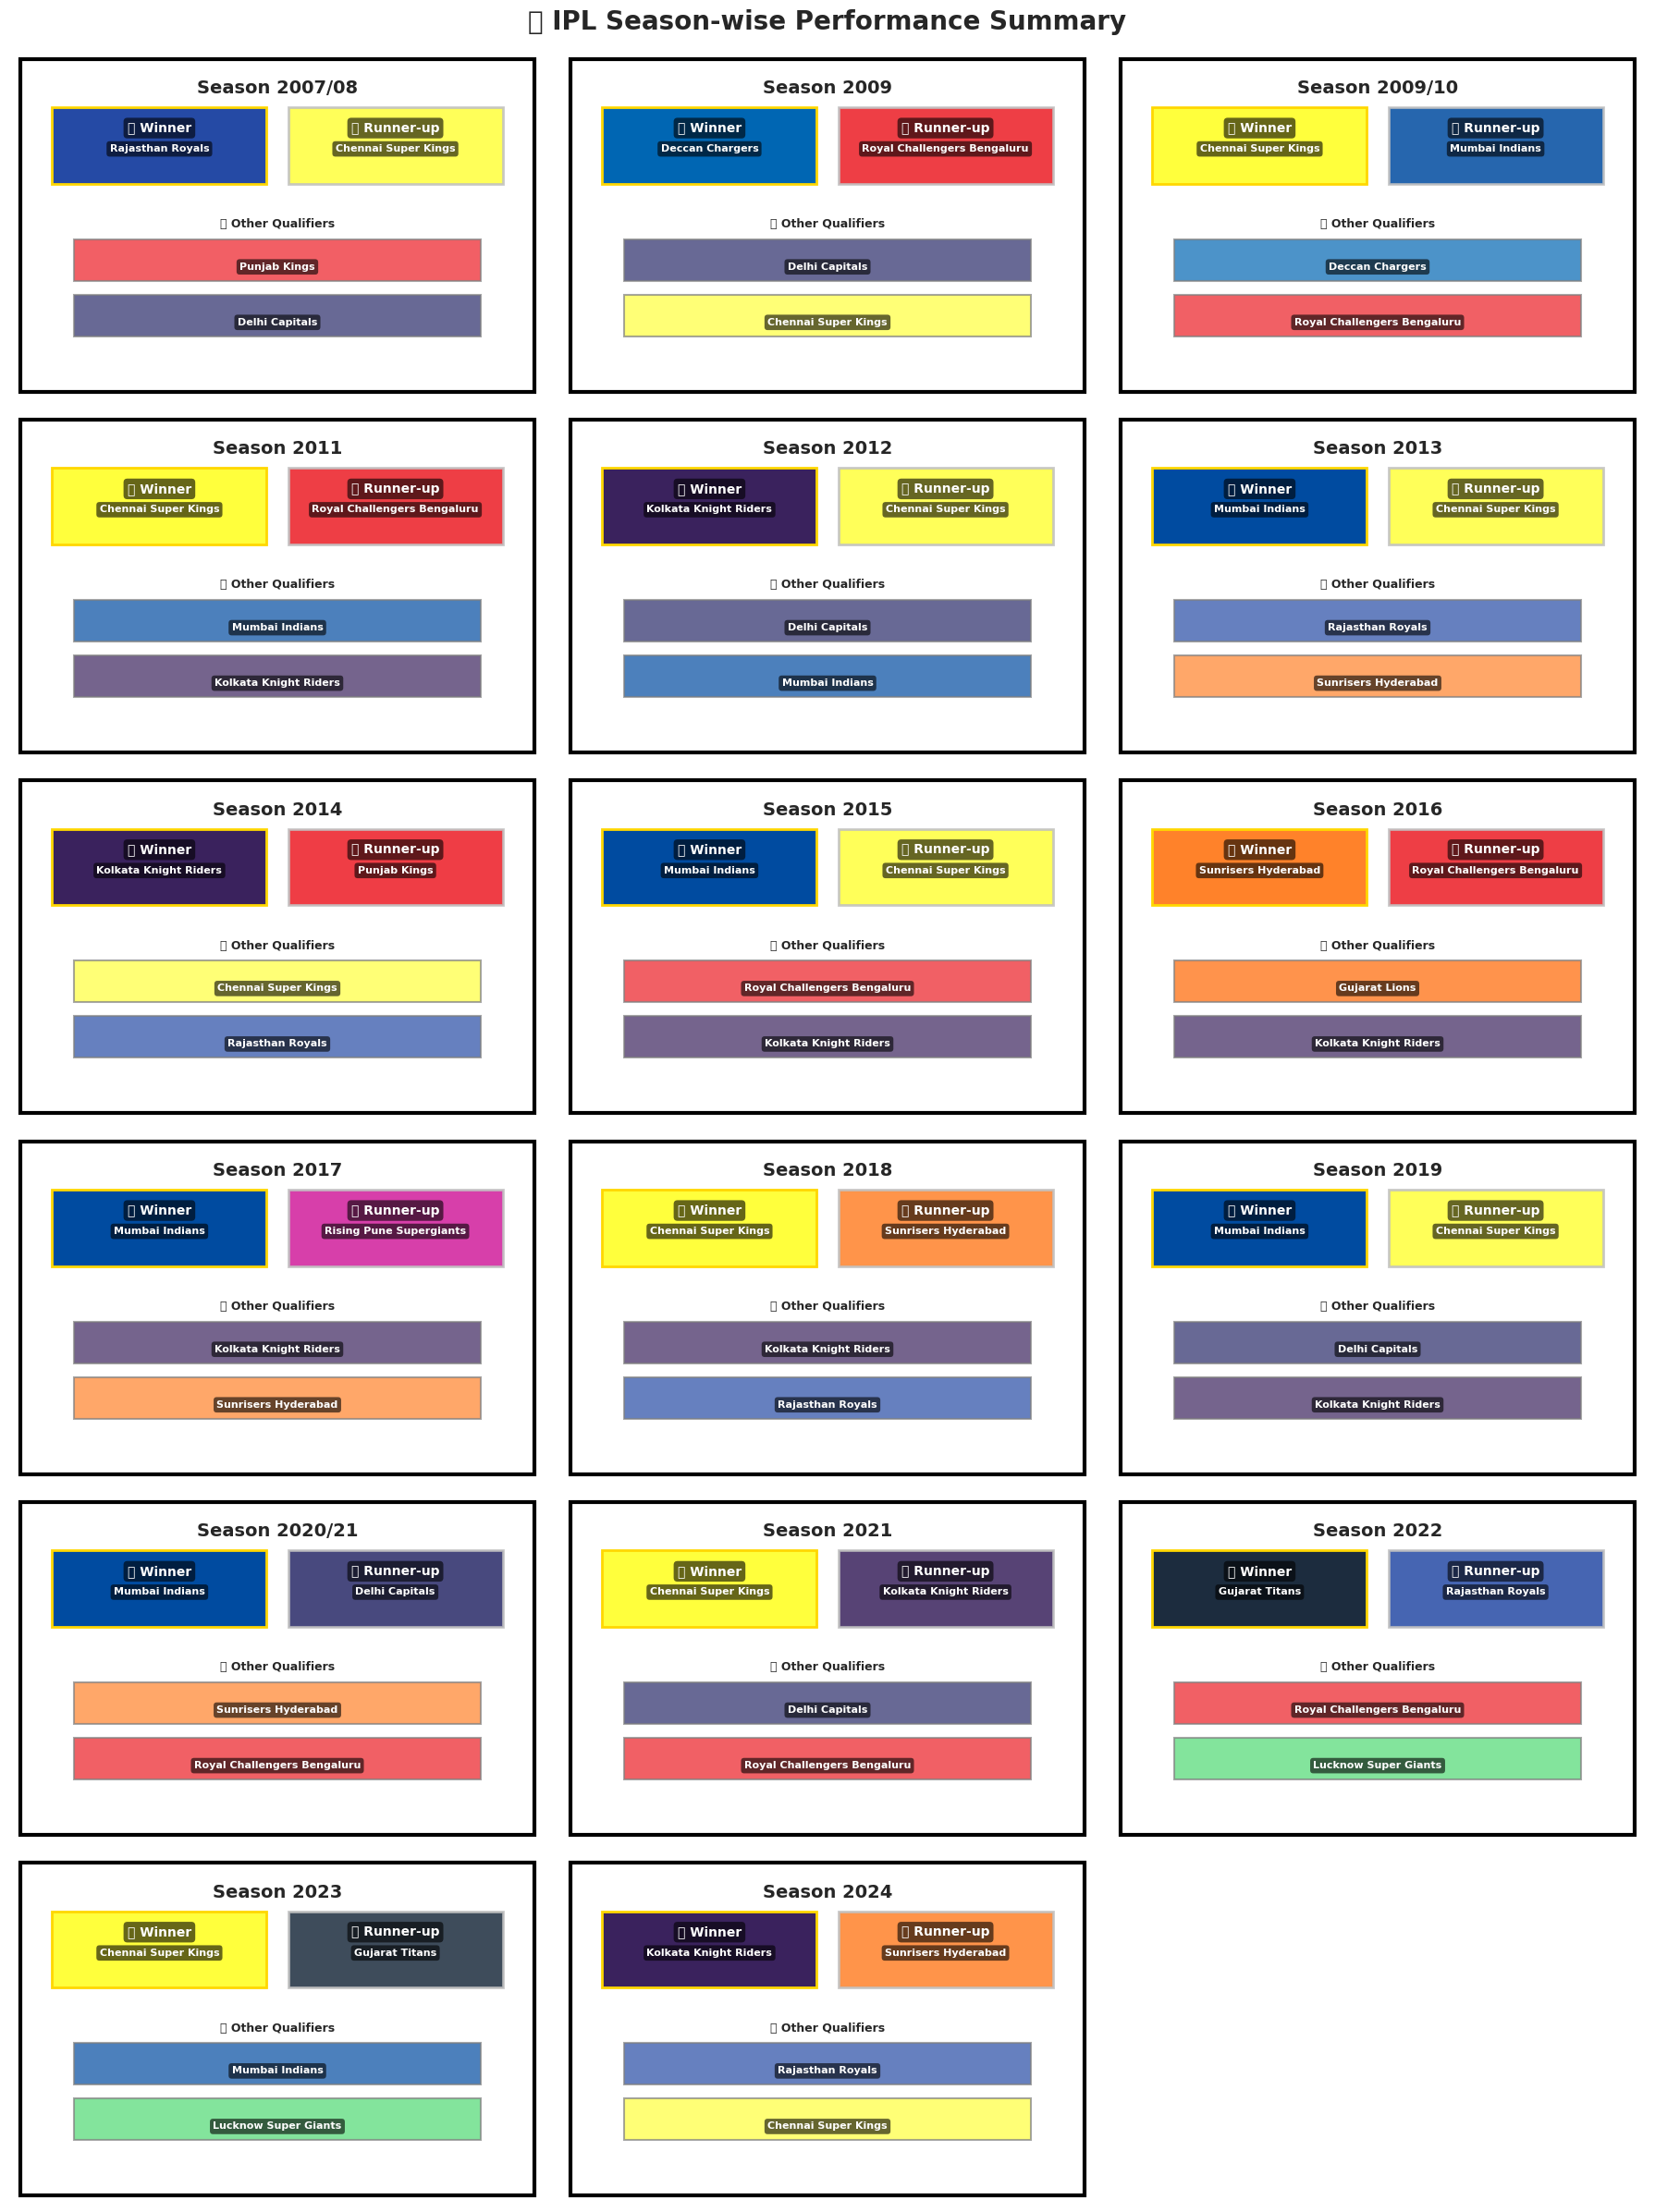

In [20]:
fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

seasons_data = full_season_data.sort_values('Season').to_dict('records')

for idx, season_info in enumerate(seasons_data):
    ax = axes[idx]
    
    season = season_info['Season']
    winner = season_info['Winner']
    runner_up = season_info['Runner-up']
    playoff_teams = season_info['Playoff_Teams']
    
    # Get other qualifiers (excluding winner and runner-up)
    other_qualifiers = [team for team in playoff_teams if team not in [winner, runner_up]]
    
    # Remove axes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Add border
    rect = plt.Rectangle((0.02, 0.02), 0.96, 0.96, 
                         linewidth=3, edgecolor='black', 
                         facecolor='white', transform=ax.transAxes)
    ax.add_patch(rect)
    
    # Season title
    ax.text(0.5, 0.92, f'Season {season}', 
            ha='center', va='top', fontsize=14, fontweight='bold',
            transform=ax.transAxes)
    
    # Winner (left side)
    winner_color = get_team_color(winner)
    winner_rect = plt.Rectangle((0.08, 0.62), 0.4, 0.22,
                                linewidth=2, edgecolor='gold',
                                facecolor=winner_color, transform=ax.transAxes)
    ax.add_patch(winner_rect)
    
    # Dark background for winner text
    ax.text(0.28, 0.78, '🏆 Winner', 
            ha='center', va='center', fontsize=10, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))
    ax.text(0.28, 0.72, winner, 
            ha='center', va='center', fontsize=8, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))
    
    # Runner-up (right side)
    runner_color = get_team_color(runner_up)
    runner_rect = plt.Rectangle((0.52, 0.62), 0.4, 0.22,
                                linewidth=2, edgecolor='silver',
                                facecolor=runner_color, alpha=0.85,
                                transform=ax.transAxes)
    ax.add_patch(runner_rect)
    
    # Dark background for runner-up text
    ax.text(0.72, 0.78, '🥈 Runner-up', 
            ha='center', va='center', fontsize=10, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))
    ax.text(0.72, 0.72, runner_up, 
            ha='center', va='center', fontsize=8, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))
    
    # Other qualifiers header
    ax.text(0.5, 0.52, '🎯 Other Qualifiers', 
            ha='center', va='top', fontsize=9, fontweight='bold',
            transform=ax.transAxes)
    
    # Other playoff teams (remaining 2)
    y_positions = [0.38, 0.22]
    for i, team in enumerate(other_qualifiers[:2]):
        team_color = get_team_color(team)
        team_rect = plt.Rectangle((0.12, y_positions[i] - 0.04), 0.76, 0.12,
                                  linewidth=1.5, edgecolor='gray',
                                  facecolor=team_color, alpha=0.7,
                                  transform=ax.transAxes)
        ax.add_patch(team_rect)
        
        # Dark background for other qualifiers text
        ax.text(0.5, y_positions[i], team, 
                ha='center', va='center', fontsize=8, fontweight='bold',
                color='white', transform=ax.transAxes,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))

# Hide extra subplots if total seasons < 18
for idx in range(len(seasons_data), len(axes)):
    axes[idx].axis('off')

plt.suptitle('🏆 IPL Season-wise Performance Summary', 
             fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../reports/figures/season_winners_runners.png', dpi=300, bbox_inches='tight')
plt.show()

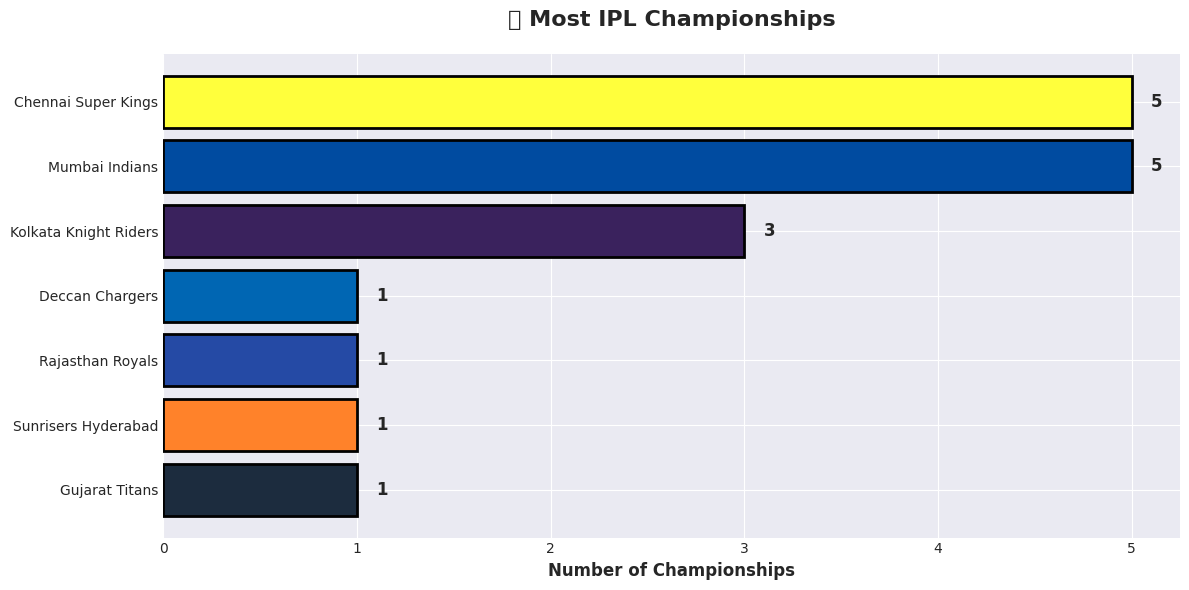

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

teams = championship_count.index
colors = [get_team_color(team) for team in teams]

ax.barh(teams, championship_count.values, color=colors, 
        edgecolor='black', linewidth=2)

# Add value labels
for i, v in enumerate(championship_count.values):
    ax.text(v + 0.1, i, str(v), va='center', fontweight='bold', fontsize=12)

ax.set_xlabel('Number of Championships', fontsize=12, fontweight='bold')
ax.set_title('🏆 Most IPL Championships', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('../reports/figures/most_championships.png', dpi=300, bbox_inches='tight')
plt.show()

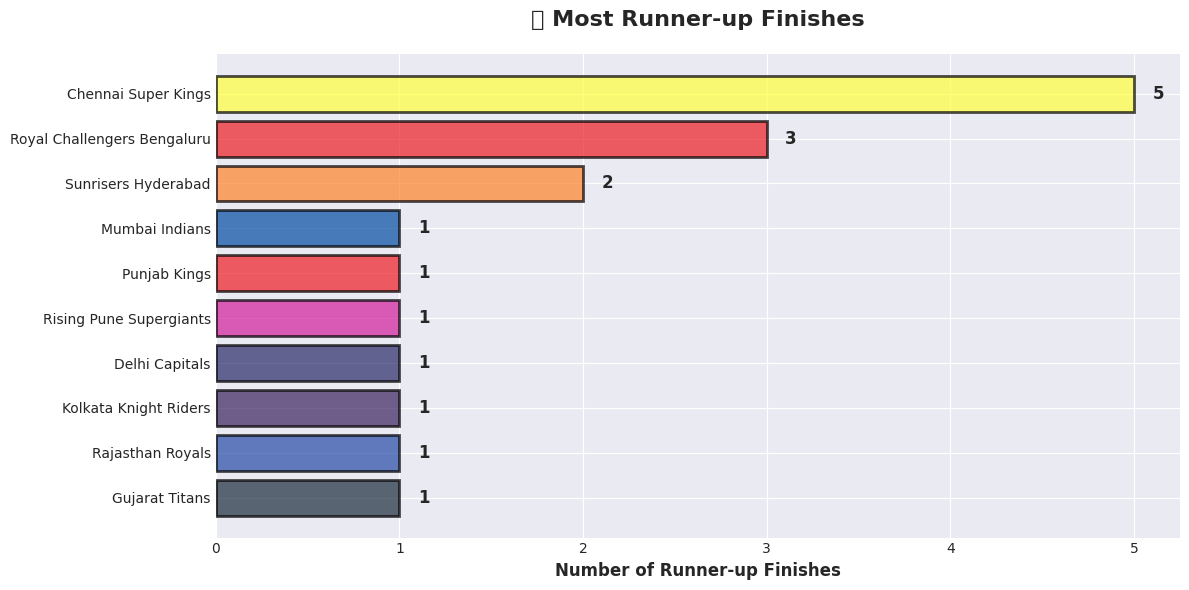

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

teams = runnerup_count.index
colors = [get_team_color(team) for team in teams]

ax.barh(teams, runnerup_count.values, color=colors, 
        edgecolor='black', linewidth=2, alpha=0.7)

# Add value labels
for i, v in enumerate(runnerup_count.values):
    ax.text(v + 0.1, i, str(v), va='center', fontweight='bold', fontsize=12)

ax.set_xlabel('Number of Runner-up Finishes', fontsize=12, fontweight='bold')
ax.set_title('🥈 Most Runner-up Finishes', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('../reports/figures/most_runnerups.png', dpi=300, bbox_inches='tight')
plt.show()

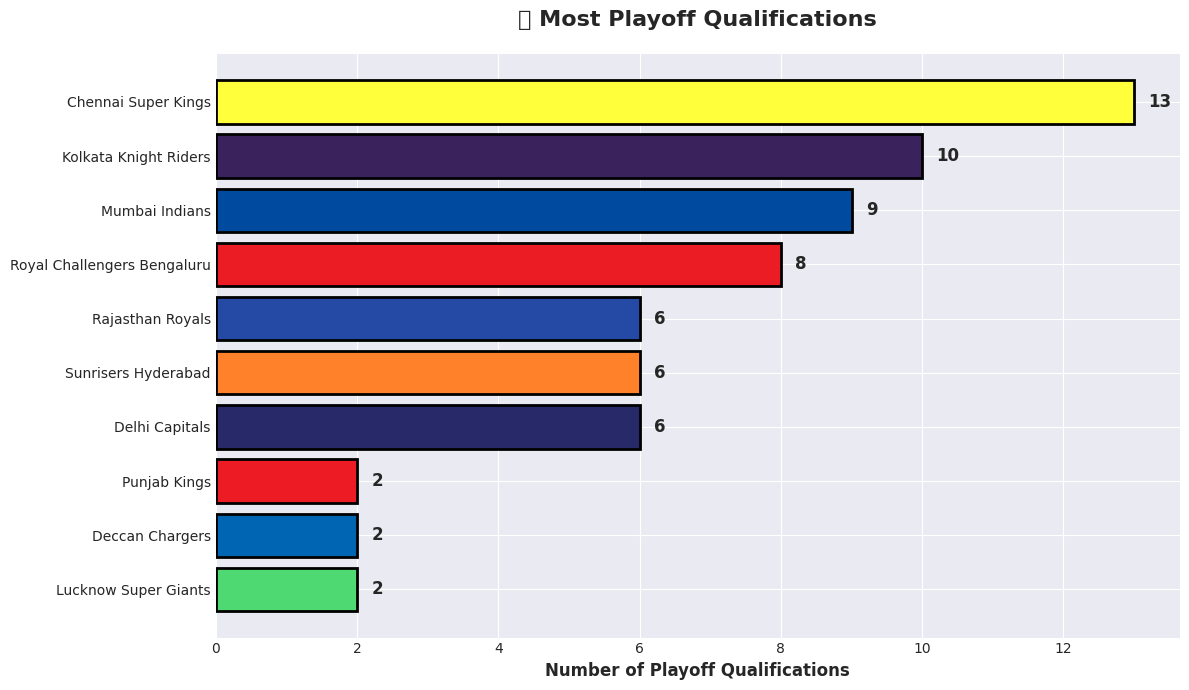

In [12]:
fig, ax = plt.subplots(figsize=(12, 7))

top_10 = playoff_count.head(10)
teams = top_10.index
colors = [get_team_color(team) for team in teams]

ax.barh(teams, top_10.values, color=colors, 
        edgecolor='black', linewidth=2)

# Add value labels
for i, v in enumerate(top_10.values):
    ax.text(v + 0.2, i, str(v), va='center', fontweight='bold', fontsize=12)

ax.set_xlabel('Number of Playoff Qualifications', fontsize=12, fontweight='bold')
ax.set_title('🎯 Most Playoff Qualifications', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('../reports/figures/most_playoff_qualifications.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
full_season_data.to_csv('../data/processed/season_summary.csv', index=False)

# Save overall statistics
stats_summary = pd.DataFrame({
    'Team': playoff_count.index,
    'Playoff_Qualifications': playoff_count.values,
    'Championships': [championship_count.get(team, 0) for team in playoff_count.index],
    'Runner_up': [runnerup_count.get(team, 0) for team in playoff_count.index]
}).sort_values('Playoff_Qualifications', ascending=False)

stats_summary.to_csv('../data/processed/team_overall_stats.csv', index=False)

print("\n Key Insights:")
print(f"   • Most Championships: {championship_count.index[0]} ({championship_count.values[0]})")
print(f"   • Most Playoffs: {playoff_count.index[0]} ({playoff_count.values[0]})")
print(f"   • Most Runner-ups: {runnerup_count.index[0]} ({runnerup_count.values[0]})")


 Key Insights:
   • Most Championships: Chennai Super Kings (5)
   • Most Playoffs: Chennai Super Kings (13)
   • Most Runner-ups: Chennai Super Kings (5)


In [21]:
# Calculate all player statistics per season
deliveries_with_season = deliveries_clean.merge(
    matches_clean[['id', 'season']], 
    left_on='match_id', right_on='id', how='left'
)

def get_player_team(season, player, is_bowler=False):
    """Get player's team for a season"""
    team_col = 'bowling_team' if is_bowler else 'batting_team'
    player_col = 'bowler' if is_bowler else 'batter'
    player_teams = deliveries_with_season[
        (deliveries_with_season['season'] == season) & 
        (deliveries_with_season[player_col] == player)
    ][team_col].mode()
    return player_teams.values[0] if len(player_teams) > 0 else 'Unknown'

# Orange Cap - Most Runs
orange_cap = deliveries_with_season.groupby(['season', 'batter']).agg({
    'batsman_runs': 'sum'
}).reset_index()
orange_cap = orange_cap.loc[orange_cap.groupby('season')['batsman_runs'].idxmax()].reset_index(drop=True)
orange_cap.columns = ['season', 'player', 'runs']
orange_cap['team'] = orange_cap.apply(lambda x: get_player_team(x['season'], x['player']), axis=1)

# Purple Cap - Most Wickets
purple_cap = deliveries_with_season.groupby(['season', 'bowler']).agg({
    'is_wicket': 'sum'
}).reset_index()
purple_cap = purple_cap.loc[purple_cap.groupby('season')['is_wicket'].idxmax()].reset_index(drop=True)
purple_cap.columns = ['season', 'player', 'wickets']
purple_cap['team'] = purple_cap.apply(lambda x: get_player_team(x['season'], x['player'], True), axis=1)

# Most Sixes
most_sixes = deliveries_with_season[deliveries_with_season['batsman_runs'] == 6].groupby(
    ['season', 'batter']
).size().reset_index(name='sixes')
most_sixes = most_sixes.loc[most_sixes.groupby('season')['sixes'].idxmax()].reset_index(drop=True)
most_sixes.columns = ['season', 'player', 'sixes']
most_sixes['team'] = most_sixes.apply(lambda x: get_player_team(x['season'], x['player']), axis=1)

# Highest Strike Rate (min 250 runs)
strike_rate = deliveries_with_season.groupby(['season', 'batter']).agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()
strike_rate['strike_rate'] = (strike_rate['batsman_runs'] / strike_rate['ball']) * 100
strike_rate = strike_rate[strike_rate['batsman_runs'] >= 250]
highest_sr = strike_rate.loc[strike_rate.groupby('season')['strike_rate'].idxmax()].reset_index(drop=True)
highest_sr.columns = ['season', 'player', 'runs', 'balls', 'strike_rate']
highest_sr['team'] = highest_sr.apply(lambda x: get_player_team(x['season'], x['player']), axis=1)

# Best Economy (min 40 overs)
economy = deliveries_with_season.groupby(['season', 'bowler']).agg({
    'total_runs': 'sum',
    'ball': 'count'
}).reset_index()
economy['overs'] = economy['ball'] / 6
economy['economy'] = economy['total_runs'] / economy['overs']
economy = economy[economy['overs'] >= 40]
best_economy = economy.loc[economy.groupby('season')['economy'].idxmin()].reset_index(drop=True)
best_economy.columns = ['season', 'player', 'runs_conceded', 'balls', 'overs', 'economy']
best_economy['team'] = best_economy.apply(lambda x: get_player_team(x['season'], x['player'], True), axis=1)

print("✅ Player statistics calculated for all seasons")

✅ Player statistics calculated for all seasons


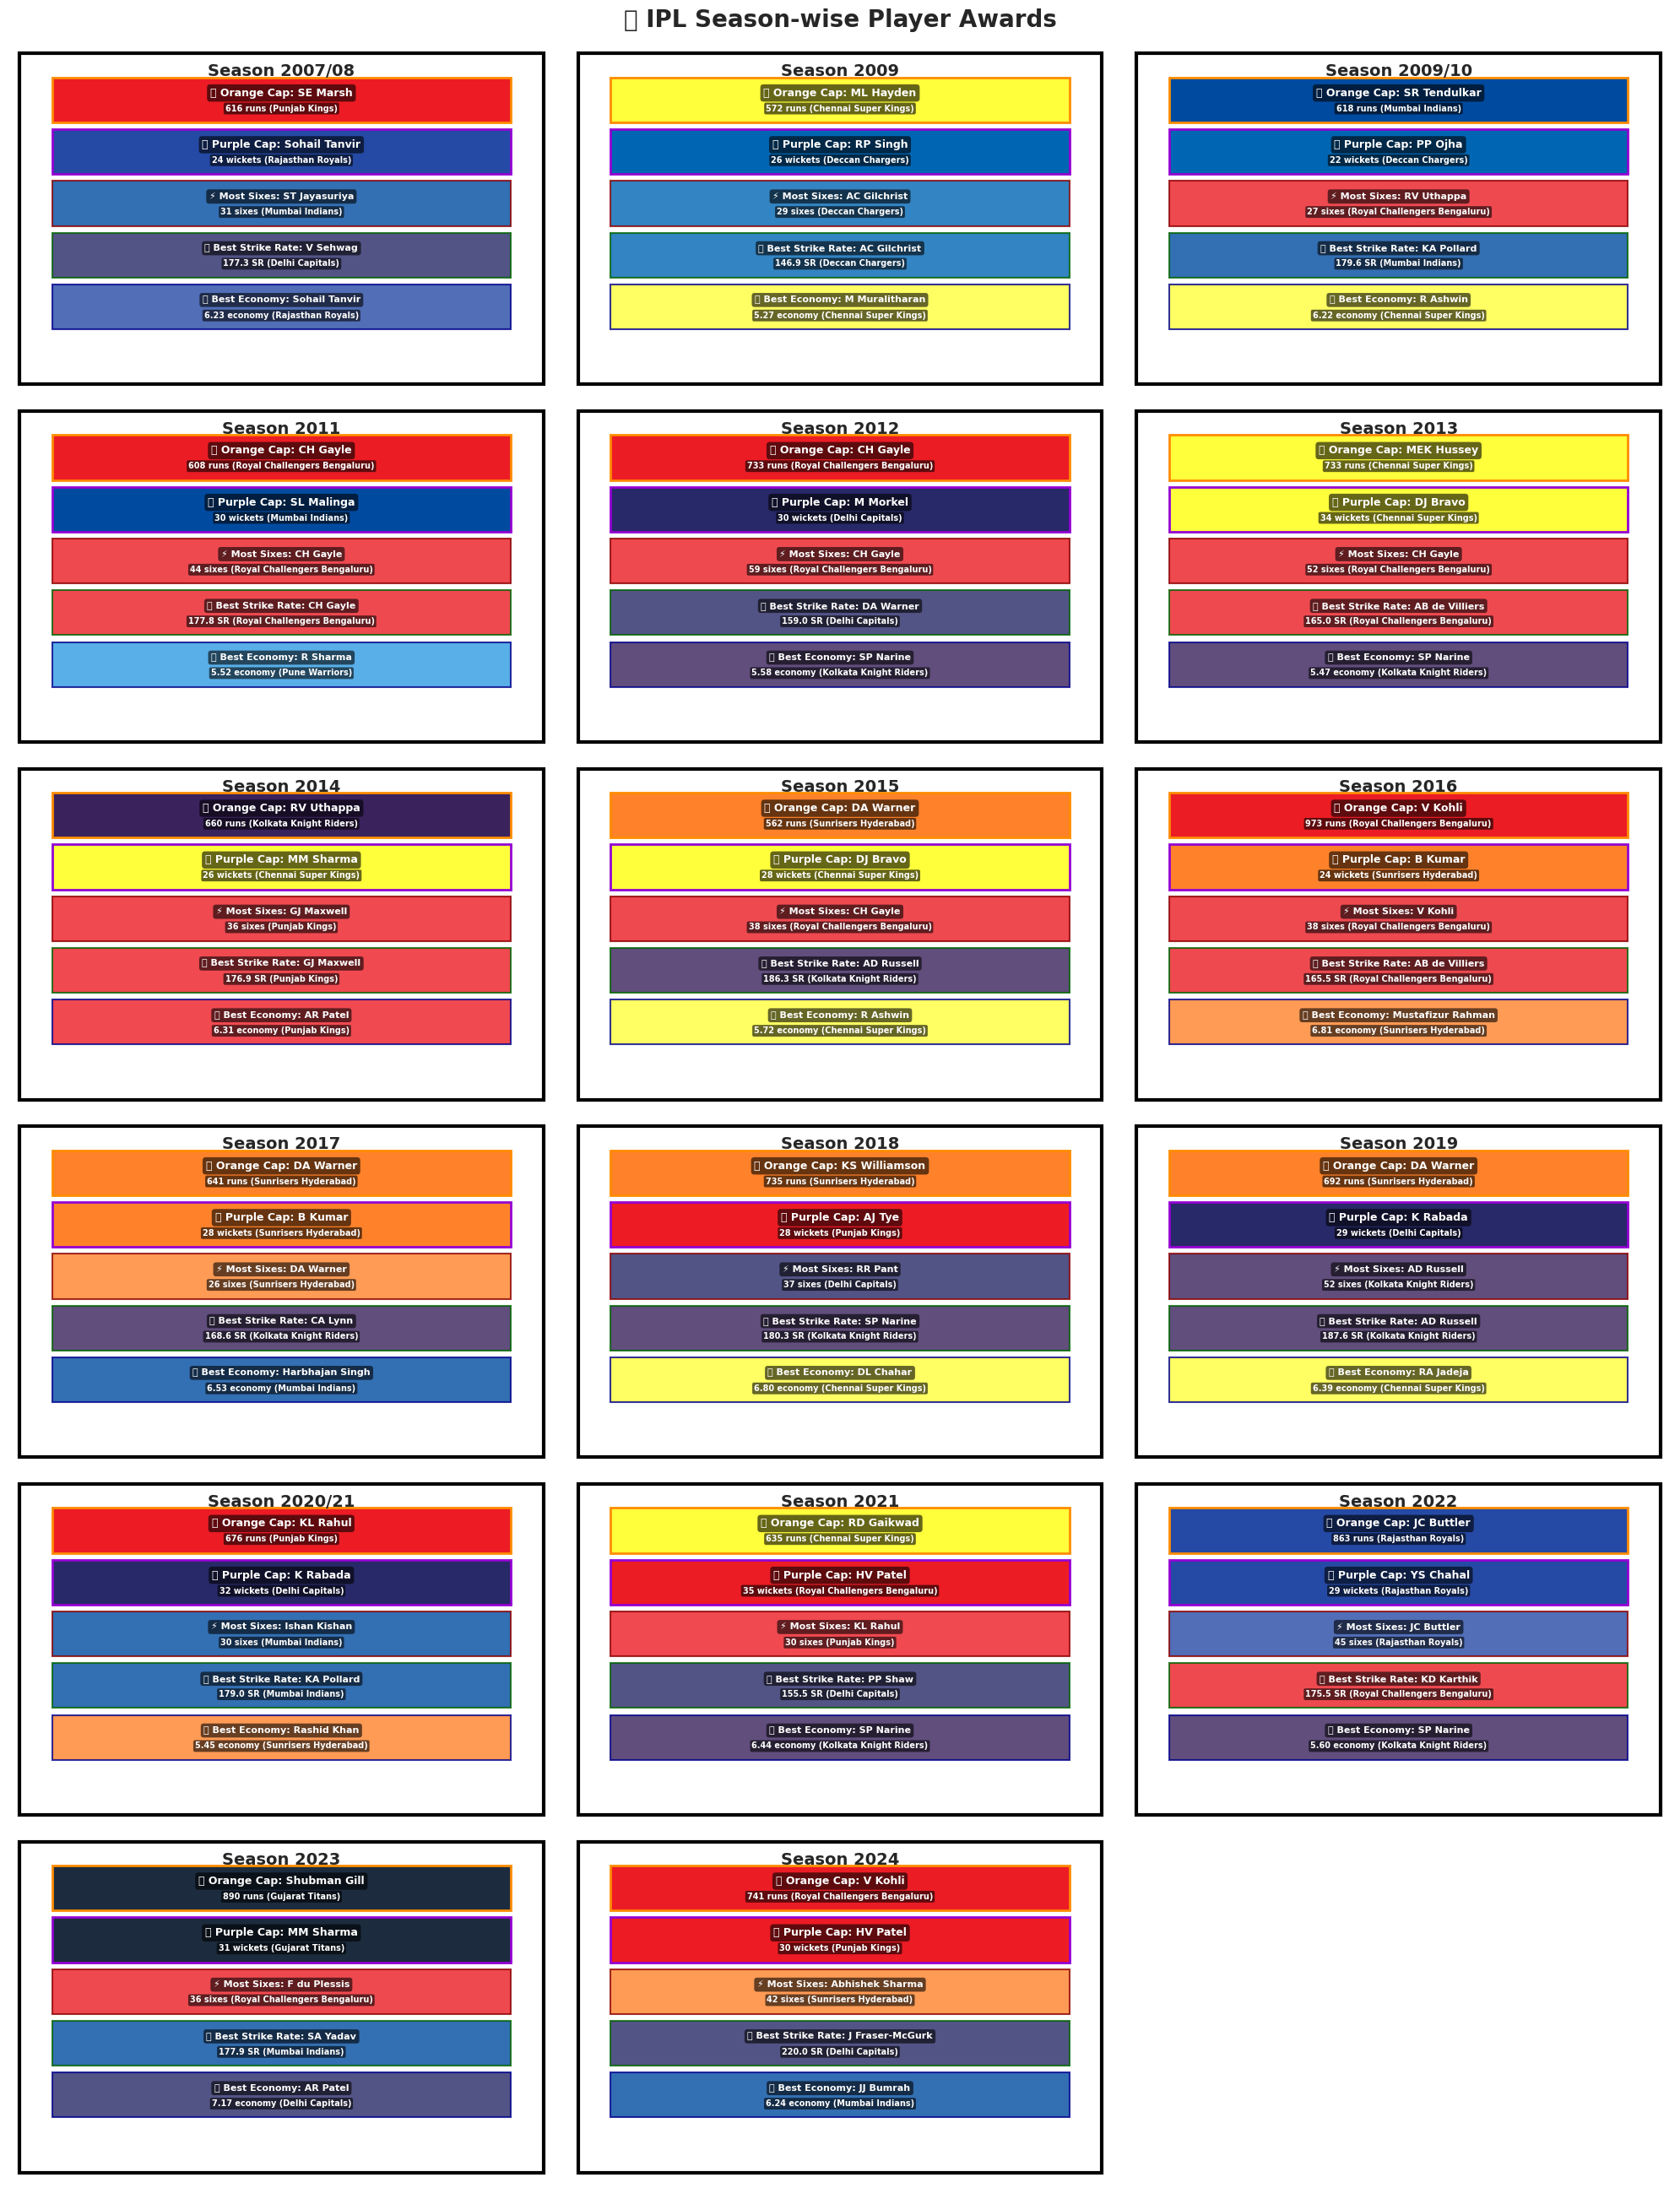

✅ Visualization saved: season_player_awards.png


In [ ]:
# Visualization - Player Awards per Season
fig, axes = plt.subplots(6, 3, figsize=(20, 26))
axes = axes.flatten()

seasons = sorted(orange_cap['season'].unique())

for idx, season in enumerate(seasons):
    ax = axes[idx]
    
    # Get data for this season
    oc = orange_cap[orange_cap['season'] == season].iloc[0]
    pc = purple_cap[purple_cap['season'] == season].iloc[0]
    ms = most_sixes[most_sixes['season'] == season].iloc[0]
    sr = highest_sr[highest_sr['season'] == season].iloc[0]
    ec = best_economy[best_economy['season'] == season].iloc[0]
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Border
    rect = plt.Rectangle((0.02, 0.02), 0.96, 0.96, 
                         linewidth=3, edgecolor='black', 
                         facecolor='white', transform=ax.transAxes)
    ax.add_patch(rect)
    
    # Season title
    ax.text(0.5, 0.95, f'Season {season}', 
            ha='center', va='top', fontsize=14, fontweight='bold',
            transform=ax.transAxes)
    
    # Orange Cap (Most Runs)
    oc_color = get_team_color(oc['team'])
    oc_rect = plt.Rectangle((0.08, 0.78), 0.84, 0.13,
                            linewidth=2, edgecolor='darkorange',
                            facecolor=oc_color, transform=ax.transAxes)
    ax.add_patch(oc_rect)
    ax.text(0.5, 0.865, f"🧡 Orange Cap: {oc['player']}", 
            ha='center', va='center', fontsize=9, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))
    ax.text(0.5, 0.82, f"{int(oc['runs'])} runs ({oc['team']})", 
            ha='center', va='center', fontsize=7, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.6, edgecolor='none'))
    
    # Purple Cap (Most Wickets)
    pc_color = get_team_color(pc['team'])
    pc_rect = plt.Rectangle((0.08, 0.63), 0.84, 0.13,
                            linewidth=2, edgecolor='darkviolet',
                            facecolor=pc_color, transform=ax.transAxes)
    ax.add_patch(pc_rect)
    ax.text(0.5, 0.715, f"💜 Purple Cap: {pc['player']}", 
            ha='center', va='center', fontsize=9, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))
    ax.text(0.5, 0.67, f"{int(pc['wickets'])} wickets ({pc['team']})", 
            ha='center', va='center', fontsize=7, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.6, edgecolor='none'))
    
    # Most Sixes
    ms_color = get_team_color(ms['team'])
    ms_rect = plt.Rectangle((0.08, 0.48), 0.84, 0.13,
                            linewidth=1.5, edgecolor='darkred',
                            facecolor=ms_color, alpha=0.8, transform=ax.transAxes)
    ax.add_patch(ms_rect)
    ax.text(0.5, 0.565, f"⚡ Most Sixes: {ms['player']}", 
            ha='center', va='center', fontsize=8, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))
    ax.text(0.5, 0.52, f"{int(ms['sixes'])} sixes ({ms['team']})", 
            ha='center', va='center', fontsize=7, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.6, edgecolor='none'))
    
    # Highest Strike Rate
    sr_color = get_team_color(sr['team'])
    sr_rect = plt.Rectangle((0.08, 0.33), 0.84, 0.13,
                            linewidth=1.5, edgecolor='darkgreen',
                            facecolor=sr_color, alpha=0.8, transform=ax.transAxes)
    ax.add_patch(sr_rect)
    ax.text(0.5, 0.415, f"🚀 Best Strike Rate: {sr['player']}", 
            ha='center', va='center', fontsize=8, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))
    ax.text(0.5, 0.37, f"{sr['strike_rate']:.1f} SR ({sr['team']})", 
            ha='center', va='center', fontsize=7, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.6, edgecolor='none'))
    
    # Best Economy
    ec_color = get_team_color(ec['team'])
    ec_rect = plt.Rectangle((0.08, 0.18), 0.84, 0.13,
                            linewidth=1.5, edgecolor='darkblue',
                            facecolor=ec_color, alpha=0.8, transform=ax.transAxes)
    ax.add_patch(ec_rect)
    ax.text(0.5, 0.265, f"🎯 Best Economy: {ec['player']}", 
            ha='center', va='center', fontsize=8, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6, edgecolor='none'))
    ax.text(0.5, 0.22, f"{ec['economy']:.2f} economy ({ec['team']})", 
            ha='center', va='center', fontsize=7, fontweight='bold',
            color='white', transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.6, edgecolor='none'))

# Hide extra subplots
for idx in range(len(seasons), len(axes)):
    axes[idx].axis('off')

plt.suptitle('🏆 IPL Season-wise Player Awards', 
             fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../reports/figures/season_player_awards.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved: season_player_awards.png")